### Looks like I did some gibberish or something good. I don't know 😃

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
# import and read csv data
df = pd.read_csv(r'C:/Users/Shakil/Downloads/Compressed/Almond.csv') 
df.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [20]:
df = df.drop('Unnamed: 0', axis=1) # drop unnecessary column
df = df.fillna(0, axis=1) # fill NaN values

### K Means Clustering

In [21]:
from sklearn.cluster import KMeans

x = df.drop('Type', axis=1)

# Normalize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
# apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(x_scaled)

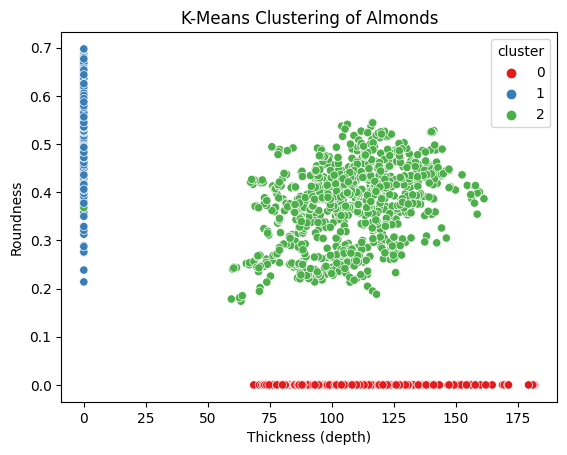

In [23]:
# visualize the cluster
sns.scatterplot(x='Thickness (depth)', y='Roundness',
               hue='cluster', data=df, palette='Set1')
plt.title('K-Means Clustering of Almonds')
plt.show()

### I don't understand this

In [22]:
x = df

wcss = []
for i in range(1,9):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=i, init='k-means++',
                   random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print(wcss)

[1100471607417.1116, 380595894618.5969, 175512004716.46625, 107178213434.7251, 75983410547.61345, 50380267866.83937, 37785820579.058334, 31323313295.153328]


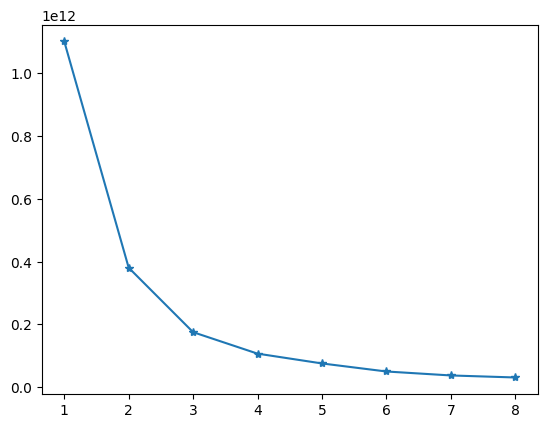

In [23]:
plt.plot(range(1,9), wcss, marker='*')
plt.xticks(range(1,9))
plt.show()

In [26]:
x.sample(5)

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
1055,397.703278,0,99.515594,29455.5,889.428493,0.237115,0.93563,2.137203,0,0,0.694672,31482.0,0
1937,290.423828,0,133.131836,30365.5,742.884337,0.45838,0.983737,1.446279,0,0,0.741291,30867.5,1
520,237.384872,0,99.158394,18629.0,608.073154,0.420914,0.979932,1.579473,0,0,0.704044,19010.5,2
1520,275.774933,143.706451,0,30420.5,721.771639,0.509292,0.98739,1.362773,1.919016,0.853495,0.779533,30809.0,0
1449,258.885406,151.085693,0,28458.5,793.972649,0.540639,0.961322,1.762744,1.7135,0.812041,0.775859,29603.5,0


<Axes: xlabel='Thickness (depth)', ylabel='Roundness'>

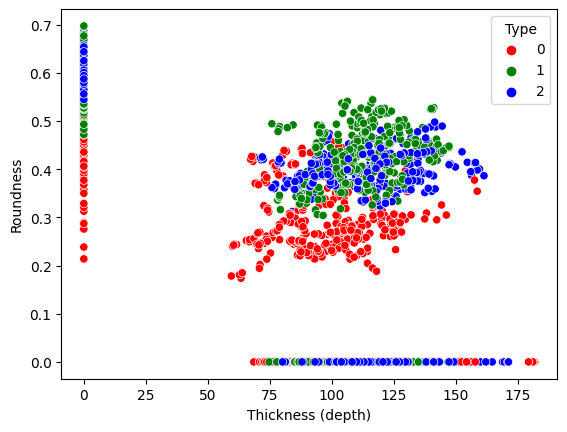

In [29]:
sns.scatterplot(x='Thickness (depth)', y='Roundness', hue='Type',
               data=df, palette=['red','green','blue'])